# Diplomado en inteligencia artificial UN
### Juan carlos Morales 


## Regresión Lineal
### Introducción

La regresión lineal es un metodo estadístico básico donde el principal objetivo es enconrar relación entre variables continuas, es una técnica uilizada en machine learning y que presenta una de las aplicaciones más sencillas, se encuentra dentro de la familia de los metodos supervisados. Los méodos supervisados, son aquellos en los que se crea una función que es capaz de predecir un valor correspondiente a travez de una serie de ejemplos de entrada.


### Historia

La formación de las nociones de correlación y regresión proviene, en gran parte, de estudios
realizados en Biología, Biometría y Eugenesia. El primer autor que se interesa en el tema fue Lambert Adolphe-Jacques Quetelet (1796-1874), conocido como Adolphe Quetelet, nacido en Gante, Bélgica. 

Sus aportaciones sobre la correlación y regresión se originan desde sus estudios sobre el hombre medio, estimando empíricamente las medias y desviaciones típicas de medidas antropométricas que, suponía, dependen de varias variables independientes tales como el sexo, edad, profesión o nivel de educación. En sus estudios relaciona dos o más variables, por ejemplo llega a obtener una ecuación de una hipérbola que relaciona la edad y la altura de las personas entre cero y 30 años (Hald, 1998). [Articulo Fuente ](https://core.ac.uk/download/pdf/20343739.pdf).

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/68/Adolphe_Qu%C3%A9telet_by_Joseph-Arnold_Demannez.jpg/220px-Adolphe_Qu%C3%A9telet_by_Joseph-Arnold_Demannez.jpg" height='300' width='300' />

### Planteamiento del modelo simple

El modelo de regresión lineal simple esta representado por 

**$$
y = \beta_{0} + \beta_{1}X + \epsilon
$$**

La ecuación de regresión lineal se representa graficamente con una linea recta donde; 

- **$\beta_{0}$** es la intersección con el eje $y$ de la linea de regresión.
- **$\beta_{1}$** es la pendiente que lleva la recta
- **$\epsilon$** es el valor promedio de $y$ para un valor dado de $x$
 

<img src="https://miro.medium.com/max/850/1*6hxonENifkzik_vYPxl-3Q.png" height='300' width='300' />



### Generalización del modelo con múltiples variables

El modelo de regresión lineal múlttiple esta representado por 

**$$
y_{j} = \beta_{0} + \beta_{1}X_{1j} + \beta_{2}X_{2j} + ....... + \beta_{k}X_{ij} + \epsilon_{j}
$$**

Donde:

- **$y$** es la variable respuesta.
- **$X$** las variable explicativas
- **$\epsilon$** los residuos
- **$\beta_{k}$** los coeficientes estimados para el efecto marginal entre cada **$X$** e **$y$**.
 

## Función de pérdida

La función de pérdida es una medida de aptitud para el modelo, el la medida que cuantifica la distancia entre el valor real y la predicción realizada con el modelo, Siempre es un valor positivo y entre más cercano a cero es mejor, esto indica que las predicciones serán más precisas.
La función de pérdida más utilizada es el error cuadratico medio y esta dado por:

**$$
l^i (w,b) = \frac{1}{2} (\tilde{y}^i - y^i)^2
$$**

<img src="https://d2l.ai/_images/fit-linreg.svg" height='300' width='300' />



# Implementación de un modelo de regresión lineal

Para la implementación del modelo se utilizara el [Conjunto de datos](https://archive.ics.uci.edu/ml/datasets/Forest+Fires) de incendios forestales en la región noreste de Portugal, y el objeivo principal es predecir el área quemada por los incendios forestales.
> Descripción detallada del conjunto de datos [Cortez and Morais, 2007] http://www3.dsi.uminho.pt/pcortez/fires.pdf 

#### Librerias utilizadas

In [235]:
# Librerias
from __future__ import absolute_import, division, print_function

import tensorflow as tf
import pathlib
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import normalize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
from scipy import stats
from matplotlib import colors
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_error

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
%matplotlib inline

Lectura del conjunto de datos utilizando la librería Pandas

In [214]:
import pandas as pd
df = pd.read_csv (r'C:\Users\USO PERSONAL\Diplomado IA UN/1. Tarea regresión/abalone_original.csv')

De acuerdo al contexto del problema la edad del molusco se obtiene de multiplicar **rings + 1.5**

In [215]:
df['age'] = df['rings']+1.5
df.drop('rings', axis = 1, inplace = True)
print("La dimensión del conjunto de datos es:",df.shape, "filas y columnas respectivamente")
df.head(5)

La dimensión del conjunto de datos es: (4177, 9) filas y columnas respectivamente


,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,age
0,M,91,73,19,102.8,44.9,20.2,30.0,16.5
1,M,70,53,18,45.1,19.9,9.7,14.0,8.5
2,F,106,84,27,135.4,51.3,28.3,42.0,10.5
3,M,88,73,25,103.2,43.1,22.8,31.0,11.5
4,I,66,51,16,41.0,17.9,7.9,11.0,8.5


#### Descripción de las variables

- Sexo
- Longitud
- Diámetro
- Altura
- Peso total
- Peso entero sin cáscara
- Peso de vísceras
- Peso de la cáscara
- Rings 
- Edad - se obtiene de sumar a rings 1.5.

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
sex               4177 non-null object
length            4177 non-null int64
diameter          4177 non-null int64
height            4177 non-null int64
whole-weight      4177 non-null float64
shucked-weight    4177 non-null float64
viscera-weight    4177 non-null float64
shell-weight      4177 non-null float64
age               4177 non-null float64
dtypes: float64(5), int64(3), object(1)
memory usage: 293.8+ KB


A continueción un resumen descriptivo con las estadísticas básicas de cada variable del conjunto de datos

In [153]:
df.describe()

,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,104.798420,81.576251,27.903280,165.748432,71.873498,36.118722,47.766172,11.433684
std,24.018583,19.847973,8.365411,98.077804,44.392590,21.922850,27.840534,3.224169
min,15.000000,11.000000,0.000000,0.400000,0.200000,0.100000,0.300000,2.500000
25%,90.000000,70.000000,23.000000,88.300000,37.200000,18.700000,26.000000,9.500000
50%,109.000000,85.000000,28.000000,159.900000,67.200000,34.200000,46.800000,10.500000
75%,123.000000,96.000000,33.000000,230.600000,100.400000,50.600000,65.800000,12.500000
max,163.000000,130.000000,226.000000,565.100000,297.600000,152.000000,201.000000,30.500000


El objetivo del presente modelo de regresión lineal múltiple, es predecir la edad en años de un abulon

*El abulón es un molusco gasterópodo, de una sola concha, comestible, parecido al caracol, que se encuentra en aguas costeras de gran parte del mundo.*

In [154]:
df.isna().sum()

sex               0
length            0
diameter          0
height            0
whole-weight      0
shucked-weight    0
viscera-weight    0
shell-weight      0
age               0
dtype: int64

In [147]:
#df_sex = df['sex'].value_counts()
#print(df_sex.head())

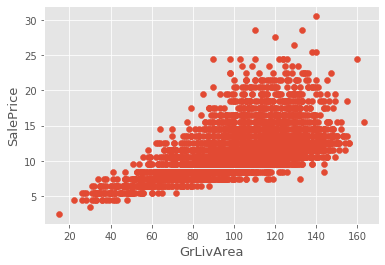

In [216]:
fig, ax = plt.subplots()
ax.scatter(df['length'], df['age'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [217]:
(mu, sigma) = norm.fit(df['age'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))


 mu = 11.43 and sigma = 3.22



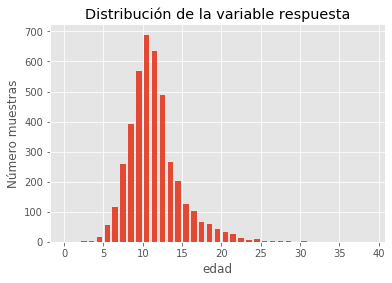

In [218]:
bins= rango = range(0, 40)
 
plt.hist(df["age"], bins, histtype='bar', rwidth=0.7)
 
plt.xlabel('edad')
plt.ylabel('Número muestras')
plt.title('Distribución de la variable respuesta')
 
plt.show()


In [70]:
df.keys()

Index(['sex', 'length', 'diameter', 'height', 'whole-weight', 'shucked-weight',
       'viscera-weight', 'shell-weight', 'age'],
      dtype='object')

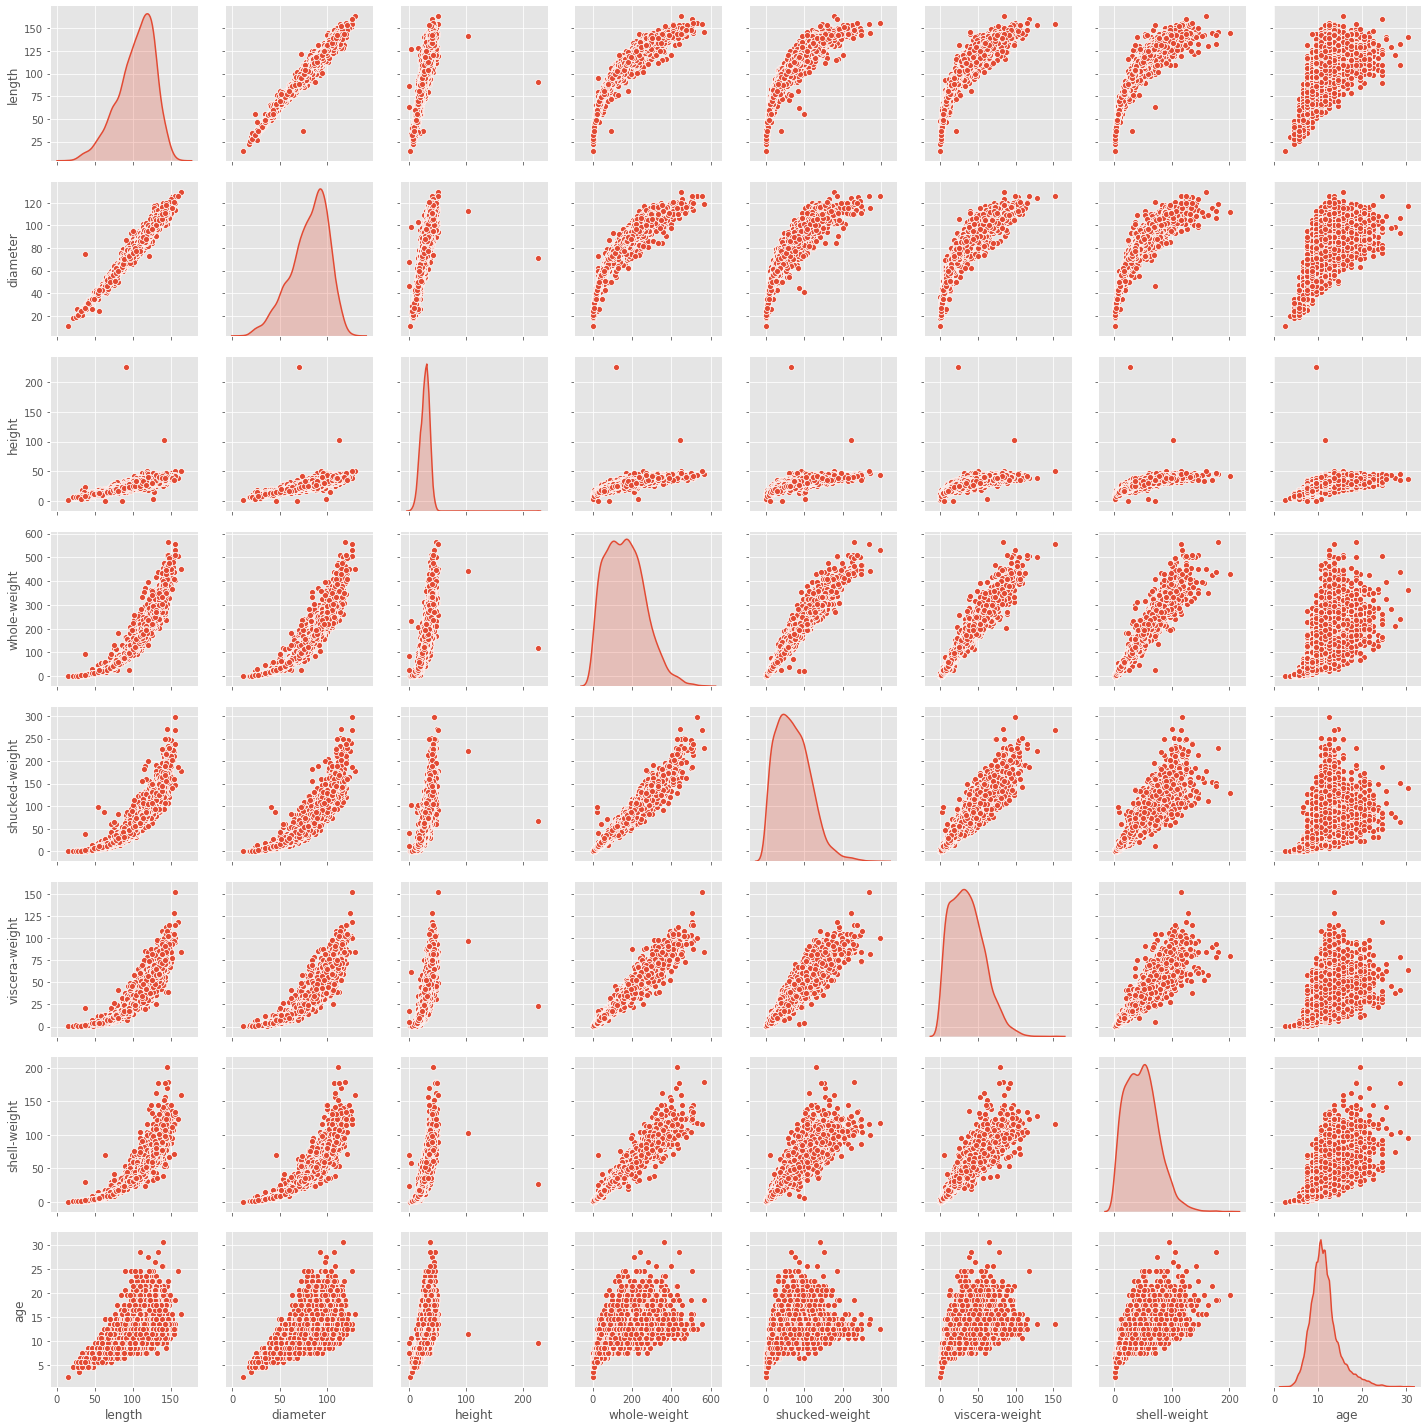

In [58]:
sns.pairplot(df[['length', 'diameter', 'height', 'whole-weight', 'shucked-weight',
       'viscera-weight', 'shell-weight','age']], diag_kind="kde")

In [219]:
y = df.pop('age')
X = df

In [183]:
X.head(3)

,sex,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight
0,M,91,73,19,102.8,44.9,20.2,30.0
1,M,70,53,18,45.1,19.9,9.7,14.0
2,F,106,84,27,135.4,51.3,28.3,42.0


In [220]:
Genero = X.pop('sex')

Se estandarizan las variables para que queden todas en la misma escala y esto no afee las predicciones del modelo.

In [221]:
X = tf.keras.utils.normalize(X, axis=-1, order=2)
X.head(3)

,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight
0,0.545165,0.437331,0.113826,0.615857,0.268988,0.121015,0.179725
1,0.675042,0.511103,0.173582,0.434920,0.191905,0.093542,0.135008
2,0.513869,0.407217,0.130891,0.656395,0.248693,0.137193,0.203608


In [222]:
X['Male'] = (Genero == "M")*1.0
X['Female'] = (Genero == "F")*1.0
X['Indef'] = (Genero == "I")*1.0

In [223]:
X.head(5)

,length,diameter,height,whole-weight,shucked-weight,viscera-weight,shell-weight,Male,Female,Indef
0,0.545165,0.437331,0.113826,0.615857,0.268988,0.121015,0.179725,1.0,0.0,0.0
1,0.675042,0.511103,0.173582,0.434920,0.191905,0.093542,0.135008,1.0,0.0,0.0
2,0.513869,0.407217,0.130891,0.656395,0.248693,0.137193,0.203608,0.0,1.0,0.0
3,0.528868,0.438720,0.150247,0.620218,0.259025,0.137025,0.186306,1.0,0.0,0.0
4,0.680817,0.526086,0.165047,0.422932,0.184646,0.081492,0.113469,0.0,0.0,1.0


In [224]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [241]:
train_stats = X_train.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
const,3341.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
length,3341.0,0.494924,0.128505,0.217955,0.394667,0.471210,0.586614,0.824163
diameter,3341.0,0.381690,0.091743,0.177648,0.309936,0.367644,0.450484,0.668396
height,3341.0,0.129363,0.034282,0.000000,0.105088,0.123764,0.149687,0.778979
whole-weight,3341.0,0.636380,0.150371,0.021372,0.569636,0.687583,0.744916,0.857007
shucked-weight,3341.0,0.274954,0.075024,0.010686,0.234717,0.286237,0.329796,0.518759
viscera-weight,3341.0,0.138660,0.038124,0.001573,0.117039,0.144506,0.165109,0.291243
shell-weight,3341.0,0.186240,0.048534,0.016029,0.160582,0.191640,0.215055,0.643092
Male,3341.0,0.365459,0.481631,0.000000,0.000000,0.000000,1.000000,1.000000
Female,3341.0,0.312781,0.463695,0.000000,0.000000,0.000000,1.000000,1.000000


In [246]:
print("Size X_train: {}, Size y_train: {}".format(len(X_train),len(y_train)))
print("Size X_test: {}, Size y_test: {}".format(len(X_test),len(y_test)))

Size X_train: 3341, Size y_train: 3341
Size X_test: 836, Size y_test: 836


In [249]:
m1 = LinearRegression()
m1.fit(X = X_train, y = y_train)

#m1 = linear_model.LinearRegression()
#reg = LinearRegression().fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [264]:
print("Intercept:", m1.intercept_)
print("Coeficiente:", list(zip(X.columns, m1.coef_.flatten(), )))


Intercept: 184983506226496.62
Coeficiente: [('length', 0.0), ('diameter', -11.127502080556212), ('height', 2.0264831368262666), ('whole-weight', 7.220198532306305), ('shucked-weight', 18.95465385187316), ('viscera-weight', -31.761079521458903), ('shell-weight', -14.168833279449789), ('Male', 13.418864030522773), ('Female', -184983506226485.1), ('Indef', -184983506226485.12)]


In [269]:
### Resultados detallados del modelo

X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                     482.5
Date:                Sat, 17 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:17:33   Log-Likelihood:                -7239.8
No. Observations:                3341   AIC:                         1.450e+04
Df Residuals:                    3331   BIC:                         1.456e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              8.3720      0.815     10.

In [270]:
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

,2.5%,97.5%
const,6.773458,9.970483
length,-14.733062,-6.949784
diameter,-2.458792,6.612258
height,3.261722,10.451898
whole-weight,16.465461,21.802819
shucked-weight,-34.427488,-29.177455
viscera-weight,-18.258595,-10.510431
shell-weight,10.365085,16.743998
Male,2.406754,3.472950
Female,2.335121,3.411392


In [272]:
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones.head(4)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
4038,11.310352,0.096379,11.121384,11.499320,7.157275,15.463429
1272,9.068800,0.097989,8.876675,9.260924,4.915578,13.222022
3384,8.274709,0.131609,8.016666,8.532752,4.117916,12.431502
3160,7.160514,0.116497,6.932101,7.388928,3.005456,11.315573
